# Лабораторные работы #2 и #3

Предмет: **Интеллектуальные системы АиСИС**

Студент: **Дарковский Илья**

Группа: **ИВМО-01-20**

## Импорты

In [53]:
import pickle

import numpy as np
from emnist import extract_training_samples
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

from classifier import NeuralNetwork as nn

## Общие функции и константы

In [2]:
np.set_printoptions(threshold=256)

N_TRAIN_SAMPLES = 50000
N_TEST_SAMPLES = 2500
N_EPOCHS = 5
RANDOM_SEED = 42

INPUT_NODES = 784
LR = 0.05

MIN_VAL = 0.00
MAX_VAL = 1

In [50]:
def prepare_data(
    X,
    Y,
    start_indx=0,
    end_indx=0,
):
    """
    Склеивание данных и меток с урезанием до требуемого числа.
    Склеиваем для того, чтобы потом можно было их перемешивать. 
    """
    concat_data = []
    for x, y in zip(
        X[start_indx:end_indx],
        Y[start_indx:end_indx],
    ):
        data = x.reshape(INPUT_NODES)
        data = (np.asfarray(data) / 255 * MAX_VAL) + MIN_VAL
        data = np.append(data, y)
        concat_data.append(data)
    return concat_data


def fit_classifier(
    clf,
    train_data,
    n_outs,
    n_epochs=N_EPOCHS,
):
    """
    Обучение классификатора на тренировочных данных 
    на протяжении заданного кол-ва эпох.
    """
    for epoch in tqdm(range(n_epochs)):
        np.random.shuffle(train_data)
        err = 0
        for data in tqdm(train_data):
            yi = int(data[-1])
            Y = np.zeros(n_outs) + MIN_VAL
            Y[yi] = MAX_VAL
            X = data[:-1]
            clf.fit(X, Y)
            err += clf.error()[0]
        print(f'MSE: {err / len(train_data)}')


def get_tpr(clf, test_data):
    """
    Измерение качества у классификатора.
    """
    tp = 0
    fn = 0
    for data in test_data:
        pred = clf.predict(data[:-1])
        max_indx = np.argmax(pred)
        if (max_indx == data[-1]):
            tp += 1
        else:
            fn += 1
    return tp / (tp + fn)


def save_model(model, path):
    with open(path, 'wb') as f:
        pickle.dump(model, f, protocol=pickle.HIGHEST_PROTOCOL)


def load_model(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

## Лабораторная работа №2

Написать свою нейросеть прямого распространения и обучить её для распознования образов цифр.

### Предобработка данных

In [4]:
digits, labels = extract_training_samples('digits')

print(digits.shape)
print(labels.shape)

(240000, 28, 28)
(240000,)


In [5]:
train_data = prepare_data(
    X=digits,
    Y=labels,
    end_indx=N_TRAIN_SAMPLES,
)
test_data = prepare_data(
    X=digits,
    Y=labels,
    start_indx=N_TRAIN_SAMPLES,
    end_indx=N_TRAIN_SAMPLES+N_TEST_SAMPLES,
)

In [6]:
len(train_data), len(test_data)

(50000, 2500)

In [7]:
train_data[0]

array([0., 0., 0., ..., 0., 0., 8.])

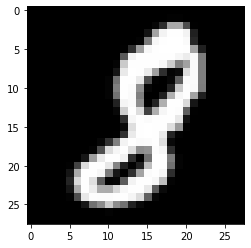

In [8]:
plt.imshow(train_data[0][:-1].reshape((28,28)), cmap='gray', vmin=0, vmax=1)

In [9]:
test_data[0]

array([0., 0., 0., ..., 0., 0., 2.])

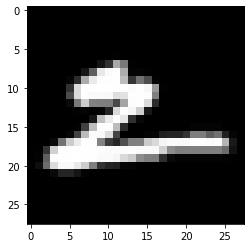

In [10]:
plt.imshow(test_data[0][:-1].reshape((28,28)), cmap='gray', vmin=0, vmax=1)

### Обучение

In [11]:
OUT_NODES = 10

digit_classifier = nn(
    input_nodes=INPUT_NODES,
    hidden_nodes=(100, 100),
    out_nodes=OUT_NODES, 
    lr=LR,
)

In [18]:
fit_classifier(
    clf=digit_classifier,
    train_data=train_data,
    n_outs=OUT_NODES,
    n_epochs=5,
)

tpr = get_tpr(digit_classifier, test_data)


MSE: 0.05343367755789744



MSE: 0.05086474348162535



MSE: 0.047887281904932084



MSE: 0.05336583475300881



MSE: 0.04978613206891945



In [19]:
print(f'TPR = {tpr}')

TPR = 0.9628


In [20]:
digit_classifier.predict(test_data[-1][:-1])

array([[5.70199908e-05],
       [2.93110598e-04],
       [5.22864465e-03],
       [2.37139282e-04],
       [1.26338969e-03],
       [9.99954375e-01],
       [2.64556144e-04],
       [2.37973603e-05],
       [2.72639304e-04],
       [1.78832257e-05]])

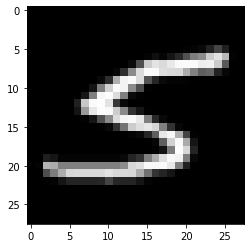

In [21]:
plt.imshow(test_data[-1][:-1].reshape((28,28)), cmap='gray', vmin=0, vmax=1)

## Лабораторная работа №3

Написать свою нейросеть прямого распространения и обучить её для распознования образов букв.

### Предобработка данных

In [22]:
letters, labels = extract_training_samples('letters')

print(letters.shape)
print(labels.shape)

(124800, 28, 28)
(124800,)


In [23]:
train_data = prepare_data(
    X=letters,
    Y=labels,
    end_indx=N_TRAIN_SAMPLES,
)
test_data = prepare_data(
    X=letters,
    Y=labels,
    start_indx=N_TRAIN_SAMPLES,
    end_indx=N_TRAIN_SAMPLES+N_TEST_SAMPLES,
)

In [24]:
len(train_data), len(test_data)

(50000, 2500)

In [25]:
labels.min(), labels.max()

(1, 26)

In [26]:
train_data[0]

array([ 0.,  0.,  0., ...,  0.,  0., 23.])

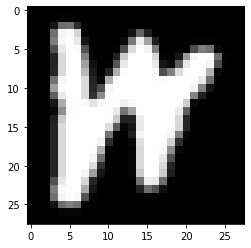

In [27]:
plt.imshow(train_data[0][:-1].reshape((28,28)), cmap='gray', vmin=0, vmax=1)

In [28]:
train_data[0][-1]

23.0

In [29]:
chr(int(train_data[0][-1]) + 64)

'W'

### Обучение

In [43]:
HIDDEN_NODES = (260, 130)
OUT_NODES = 27

letter_classifier = nn(
    input_nodes=INPUT_NODES,
    hidden_nodes=HIDDEN_NODES,
    out_nodes=OUT_NODES,
    lr=0.05,
)

In [44]:
fit_classifier(
    clf=letter_classifier,
    train_data=train_data,
    n_outs=OUT_NODES,
    n_epochs=5,
)


MSE: 0.48370847793916005



MSE: 0.337604553736345



MSE: 0.31138215127095453



MSE: 0.29759489651167403



MSE: 0.29607698083907075



In [45]:
print(f'TPR = {get_tpr(letter_classifier, test_data)}')

TPR = 0.8028


In [46]:
letter_classifier.predict(test_data[0][:-1])

array([[6.33748627e-04],
       [4.75328647e-03],
       [3.87131637e-02],
       [3.01850384e-02],
       [2.24507187e-05],
       [8.48739187e-01],
       [1.10137052e-03],
       [1.15007815e-02],
       [1.18788925e-04],
       [1.12448584e-03],
       [5.81668597e-06],
       [2.14953069e-03],
       [2.93515617e-04],
       [1.96815131e-03],
       [1.51605870e-05],
       [5.58729537e-04],
       [1.51914611e-04],
       [2.77701865e-03],
       [3.09067092e-03],
       [6.83068545e-03],
       [1.49410430e-03],
       [3.79383400e-03],
       [1.58533078e-03],
       [1.56453486e-03],
       [5.91196133e-04],
       [1.56012167e-04],
       [9.31759098e-03]])

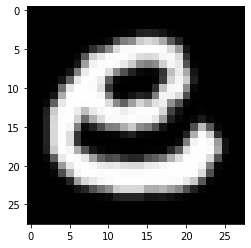

In [47]:
plt.imshow(test_data[0][:-1].reshape((28,28)), cmap='gray', vmin=0, vmax=1)

In [48]:
chr(int(test_data[0][-1]) + 64)

'E'

In [54]:
save_model(letter_classifier, 'l_clf.model')
save_model(digit_classifier, 'd_clf.model')